<a href="https://colab.research.google.com/github/georgeray1999-CS/Lab_Assignments/blob/main/Lab8/Lab8_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data unpacked and uploaded manually from local drive

In [1]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [2]:
import os
# get all paths
data_dir_list = os.listdir('/content/data')
print(data_dir_list)

['horse-173.jpg', 'horse-2.jpg', 'horse-157.jpg', 'horse-25.jpg', 'rider-26.jpg', 'horse-97.jpg', 'cat.10.jpg', 'rider-61.jpg', 'rider-55.jpg', 'rider-111.jpg', 'rider-191.jpg', 'dog.19.jpg', 'horse-43.jpg', 'cat.137.jpg', 'dog.32.jpg', 'rider-2.jpg', 'rider-79.jpg', 'cat.34.jpg', 'rider-23.jpg', 'cat.70.jpg', 'horse-119.jpg', 'rider-186.jpg', 'rider-75.jpg', 'cat.140.jpg', 'cat.115.jpg', 'cat.46.jpg', 'rider-35.jpg', 'cat.60.jpg', 'rider-59.jpg', 'cat.75.jpg', 'horse-104.jpg', 'horse-55.jpg', 'rider-133.jpg', 'dog.82.jpg', 'dog.54.jpg', 'cat.7.jpg', 'rider-87.jpg', 'rider-56.jpg', 'cat.195.jpg', 'rider-104.jpg', 'cat.117.jpg', 'horse-134.jpg', 'horse-193.jpg', 'cat.41.jpg', 'cat.139.jpg', 'dog.80.jpg', 'dog.47.jpg', 'dog.66.jpg', 'rider-45.jpg', 'dog.72.jpg', 'dog.132.jpg', 'dog.30.jpg', 'horse-71.jpg', 'rider-128.jpg', 'horse-22.jpg', 'cat.50.jpg', 'rider-77.jpg', 'dog.149.jpg', 'cat.37.jpg', 'dog.193.jpg', 'rider-194.jpg', 'dog.89.jpg', 'horse-199.jpg', 'rider-115.jpg', 'cat.19.jpg'

In [3]:
# rename files
for file in os.listdir('/content/data'):
  if ('horse' in file) or ('rider' in file):
    word_label = file.split('-')[0]
    number_label = file.split('-')[1]

    new_name = '/content/data/' + word_label + '.' + number_label
    os.rename('/content/data/' + file, new_name)


In [4]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/human_horse_cat_dog_data'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
import shutil

# cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  
# dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

# humans
fnames = ['rider.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider.{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider.{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

# horses
fnames = ['horse.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse.{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse.{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [8]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'rider': return 3
    elif word_label == 'horse': return 2
    elif word_label == 'dog': return 1
    elif word_label == 'cat': return 0

In [9]:
def createDataSplitSet(datapath):
    X = []
    y = []

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [10]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

# Model building

## VGG16

In [65]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [66]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Feature extraction

In [64]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='softmax', name='output')(last_layer)  # 4 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [23]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 8s 191ms/step - loss: 0.3327 - accuracy: 0.8613 - val_loss: 0.3081 - val_accuracy: 0.9050
Epoch 2/10
40/40 [==============================] - 7s 182ms/step - loss: 0.2430 - accuracy: 0.9169 - val_loss: 0.3255 - val_accuracy: 0.8700
Epoch 3/10
40/40 [==============================] - 7s 182ms/step - loss: 0.2180 - accuracy: 0.9283 - val_loss: 0.2881 - val_accuracy: 0.8900
Epoch 4/10
40/40 [==============================] - 7s 181ms/step - loss: 0.2431 - accuracy: 0.9206 - val_loss: 0.2996 - val_accuracy: 0.8900
Epoch 5/10
40/40 [==============================] - 7s 181ms/step - loss: 0.2441 - accuracy: 0.9047 - val_loss: 0.2413 - val_accuracy: 0.9250
Epoch 6/10
40/40 [==============================] - 7s 182ms/step - loss: 0.2790 - accuracy: 0.8873 - val_loss: 0.2171 - val_accuracy: 0.9050
Epoch 7/10
40/40 [==============================] - 7s 182ms/step - loss: 0.1872 - accuracy: 0.9403 - val_loss: 0.3462 - val_accuracy: 0.8600
Epoch 

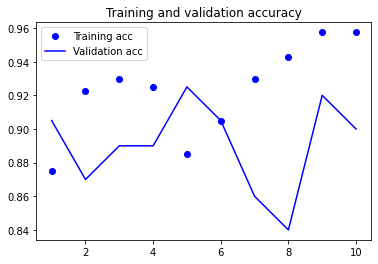

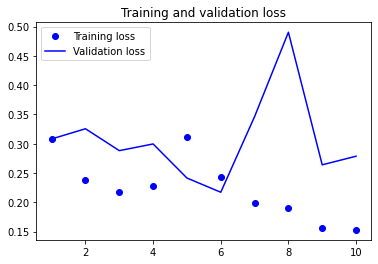

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)

ypred = np.argmax(predictions, axis=1)

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.9574999809265137
Val Accuracy:	 0.8999999761581421
Test Accuracy:	 0.8701923076923077
Precision:	 [0.88       0.73770492 0.95918367 0.9375    ]
Recall:		 [0.84615385 0.86538462 0.90384615 0.86538462]
F1 Score:	 [0.8627451  0.79646018 0.93069307 0.9       ]


### Fine tuning

In [67]:
from keras.layers import Conv2D, MaxPool2D, Flatten

last_layer = model.get_layer('block4_pool').output

x = Conv2D(128, (3, 3))(last_layer)
x = Conv2D(64, (3, 3))(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten(name='flatten')(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-6]:
	layer.trainable = False

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [68]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [70]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 7s 163ms/step - loss: 1.9598 - accuracy: 0.4314 - val_loss: 0.6227 - val_accuracy: 0.7150
Epoch 2/10
40/40 [==============================] - 6s 155ms/step - loss: 0.2015 - accuracy: 0.9258 - val_loss: 0.5925 - val_accuracy: 0.7950
Epoch 3/10
40/40 [==============================] - 6s 153ms/step - loss: 0.0436 - accuracy: 0.9895 - val_loss: 0.4431 - val_accuracy: 0.8300
Epoch 4/10
40/40 [==============================] - 6s 154ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4351 - val_accuracy: 0.8400
Epoch 5/10
40/40 [==============================] - 6s 154ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4336 - val_accuracy: 0.8300
Epoch 6/10
40/40 [==============================] - 6s 154ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.8300
Epoch 7/10
40/40 [==============================] - 6s 154ms/step - loss: 8.4149e-04 - accuracy: 1.0000 - val_loss: 0.4366 - val_accuracy: 0.8300
Ep

In [71]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)

ypred = np.argmax(predictions, axis=1)

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.9574999809265137
Val Accuracy:	 0.8999999761581421
Test Accuracy:	 0.8076923076923077
Precision:	 [0.74074074 0.76190476 0.88679245 0.83050847]
Recall:		 [0.76923077 0.61538462 0.90384615 0.94230769]
F1 Score:	 [0.75471698 0.68085106 0.8952381  0.88288288]


## VGG19

In [84]:
from tensorflow.keras.applications import VGG19

model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Feature extraction

In [85]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='softmax', name='output')(last_layer)  # 4 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [86]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [88]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 10s 225ms/step - loss: 1.6356 - accuracy: 0.3171 - val_loss: 0.8379 - val_accuracy: 0.6600
Epoch 2/10
40/40 [==============================] - 9s 216ms/step - loss: 0.8207 - accuracy: 0.6844 - val_loss: 0.6482 - val_accuracy: 0.7600
Epoch 3/10
40/40 [==============================] - 9s 217ms/step - loss: 0.7158 - accuracy: 0.6986 - val_loss: 0.5783 - val_accuracy: 0.7750
Epoch 4/10
40/40 [==============================] - 9s 217ms/step - loss: 0.5797 - accuracy: 0.8027 - val_loss: 0.5637 - val_accuracy: 0.7700
Epoch 5/10
40/40 [==============================] - 9s 218ms/step - loss: 0.5475 - accuracy: 0.8086 - val_loss: 0.4867 - val_accuracy: 0.8150
Epoch 6/10
40/40 [==============================] - 9s 217ms/step - loss: 0.7191 - accuracy: 0.7004 - val_loss: 0.5492 - val_accuracy: 0.7500
Epoch 7/10
40/40 [==============================] - 9s 216ms/step - loss: 0.3971 - accuracy: 0.8753 - val_loss: 0.4626 - val_accuracy: 0.8100
Epoch

In [89]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)

ypred = np.argmax(predictions, axis=1)

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.9574999809265137
Val Accuracy:	 0.8999999761581421
Test Accuracy:	 0.8653846153846154
Precision:	 [0.8490566  0.84444444 0.91071429 0.85185185]
Recall:		 [0.86538462 0.73076923 0.98076923 0.88461538]
F1 Score:	 [0.85714286 0.78350515 0.94444444 0.86792453]


### Fine tuning

In [79]:
from keras.layers import Conv2D, MaxPool2D, Flatten

last_layer = model.get_layer('block4_pool').output

x = Conv2D(128, (3, 3))(last_layer)
x = Conv2D(64, (3, 3))(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten(name='flatten')(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-6]:
	layer.trainable = False

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [80]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [81]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [82]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 8s 192ms/step - loss: 4.1509 - accuracy: 0.3799 - val_loss: 1.0595 - val_accuracy: 0.6700
Epoch 2/10
40/40 [==============================] - 7s 185ms/step - loss: 0.1999 - accuracy: 0.9285 - val_loss: 1.2210 - val_accuracy: 0.6650
Epoch 3/10
40/40 [==============================] - 7s 184ms/step - loss: 0.1058 - accuracy: 0.9637 - val_loss: 0.9058 - val_accuracy: 0.7100
Epoch 4/10
40/40 [==============================] - 7s 183ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.9001 - val_accuracy: 0.7000
Epoch 5/10
40/40 [==============================] - 7s 183ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9194 - val_accuracy: 0.7250
Epoch 6/10
40/40 [==============================] - 7s 183ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.9310 - val_accuracy: 0.7150
Epoch 7/10
40/40 [==============================] - 7s 184ms/step - loss: 8.2877e-04 - accuracy: 1.0000 - val_loss: 0.9392 - val_accuracy: 0.7050
Ep

In [83]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)

ypred = np.argmax(predictions, axis=1)

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.9574999809265137
Val Accuracy:	 0.8999999761581421
Test Accuracy:	 0.7307692307692307
Precision:	 [0.6440678  0.71428571 0.75       0.81481481]
Recall:		 [0.73076923 0.48076923 0.86538462 0.84615385]
F1 Score:	 [0.68468468 0.57471264 0.80357143 0.83018868]
